In [1]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import json

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import re

from selenium import webdriver

from time    import sleep , time
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비
# import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model    import LogisticRegression


from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve  ,  roc_curve , roc_auc_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

from   IPython.display import Image

sklearn.__version__

'0.24.2'

In [2]:
diabetes = pd.read_csv('/Users/choijaewoo/ml-data/classification-diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
features = diabetes.iloc[ : , : -1]
target   = diabetes.iloc[ : ,  -1]

In [5]:
print('데이터 클린징 없이 모델의 성능 예측 - ')
X_train , X_test , y_train , y_test = train_test_split(features ,
                                                       target ,
                                                       test_size = 0.2 ,
                                                       random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

데이터 클린징 없이 모델의 성능 예측 - 


((614, 8), (154, 8), (614,), (154,))

In [6]:
logstic_model = LogisticRegression()
forest_model  = RandomForestClassifier()
tree_model    = DecisionTreeClassifier()

In [7]:
logstic_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
logstic_model_pred = logstic_model.predict(X_test)
logstic_model_prob = logstic_model.predict_proba(X_test)[ :  , 1]


In [9]:
logstic_model_prob

array([0.16846538, 0.06512375, 0.71388392, 0.12255805, 0.44839584,
       0.69996978, 0.97249214, 0.11876633, 0.8650555 , 0.22912035,
       0.10132314, 0.86404758, 0.45623766, 0.28802729, 0.72231761,
       0.33599715, 0.09388162, 0.22185095, 0.51703072, 0.21115066,
       0.27089223, 0.01705893, 0.53982976, 0.96729601, 0.26008286,
       0.85795684, 0.45993819, 0.30396378, 0.50267168, 0.55690897,
       0.05126332, 0.95597409, 0.14207435, 0.57231006, 0.19148265,
       0.31541653, 0.92186077, 0.03136534, 0.19340538, 0.34090801,
       0.35675632, 0.81195388, 0.43698278, 0.12465618, 0.27343124,
       0.9116022 , 0.09718806, 0.23975234, 0.88441895, 0.90230492,
       0.11623493, 0.04447377, 0.33967985, 0.74487125, 0.74344476,
       0.86721213, 0.11522613, 0.06987454, 0.79096536, 0.12689786,
       0.18206499, 0.15471529, 0.3068781 , 0.29638743, 0.39915678,
       0.26313637, 0.17186488, 0.03033999, 0.17430173, 0.03420737,
       0.04129271, 0.70269632, 0.12028568, 0.23119307, 0.20902

In [10]:
def metrics_evaluation(target , prediction = None , prediction_prob = None) :
    print('confusion matrix \n' , confusion_matrix(target , prediction))
    print()
    print('accuracy \n'    , accuracy_score(target , prediction))
    print()
    print('recall \n'      , recall_score(target , prediction))
    print()
    print('precision \n'   , precision_score(target , prediction))
    print()
    print('f1 score \n'   , f1_score(target , prediction))
    print()
    print('AUC \n'        , roc_auc_score(target , prediction_prob))


In [11]:
print('AUC 를 포함한 모델의 성능 평가 - ')
metrics_evaluation(y_test , logstic_model_pred, logstic_model_prob)


AUC 를 포함한 모델의 성능 평가 - 
confusion matrix 
 [[87 14]
 [24 29]]

accuracy 
 0.7532467532467533

recall 
 0.5471698113207547

precision 
 0.6744186046511628

f1 score 
 0.6041666666666666

AUC 
 0.7829254623575566


In [12]:
def precision_recall_plot(y_test , pred_proba) :

    precisions , recalls , thresholds = precision_recall_curve(y_test , pred_proba)

    plt.figure( figsize = (15, 5))


    plt.plot(thresholds , precisions[0 : thresholds.shape[0] ] , label = 'precision')
    plt.plot(thresholds , recalls[0 : thresholds.shape[0] ] , label = 'recall')

    plt.xlabel('threshold ratio')
    plt.ylabel('precision and recall value')

    start , end = plt.xlim()
    plt.xticks( np.round( np.arange(start , end , 0.1) , 2) )

    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    plt.close()

임계값 별 정밀도-재현율 시각화




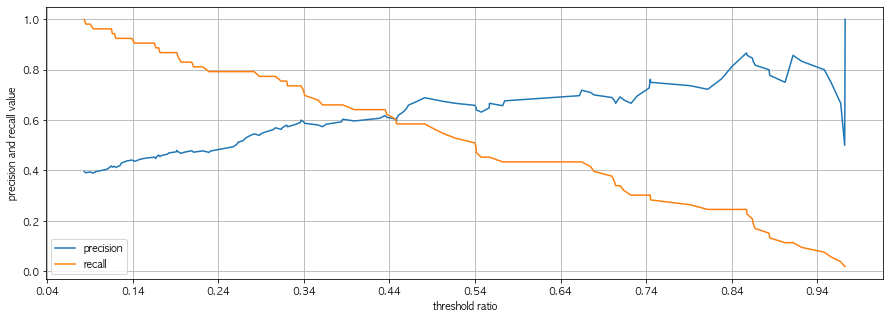

In [13]:
print('임계값 별 정밀도-재현율 시각화')
print()
print()
precision_recall_plot(y_test , logstic_model_prob)

In [14]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
print('이상치 처리')
print('0 은 결측값이 아니기때문에 결측값으로 대체하고 평균으로 변환 - ')
feature_lst = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[feature_lst] = diabetes[feature_lst].replace(0 , np.NaN)


이상치 처리
0 은 결측값이 아니기때무에 결측값으로 대체하고 평균으로 변환 - 


In [16]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
diabetes[feature_lst] = diabetes[feature_lst].replace(np.NaN  , diabetes[feature_lst].mean() )

In [18]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
